# HEART DISEASE PREDICTION USING ML

## Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings("ignore")

['-1.14-windows.xml', '.anaconda', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lemminx', '.m2', '.matplotlib', '.nbi', '.p2', '.spyder-py3', '.vscode', '3D Objects', 'ansel', 'AppData', 'Application Data', 'Aravinth', 'Contacts', 'Cookies', 'derby.log', 'Desktop', 'Documents', 'Downloads', 'eclipse-workspace', 'Favorites', 'first.py.ipynb', 'heart.csv', 'Heart_disease_prediction-Aravinth.ipynb', 'Heart_disease_prediction-Copy2.ipynb', 'Heart_disease_prediction-pro.ipynb', 'Heart_disease_prediction.ipynb', 'IntelGraphicsProfiles', 'Jedi', 'knime-workspace', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'netstat', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TM.blf', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{1c2b59c6-c5f5-11eb-bacb-000d3a96488e}.TMContainer00000000000000000002.regtrans-ms'

## Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Shape of dataset

In [3]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [4]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


#### Description

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### we have no missing values

In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [9]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([1, 0], dtype=int64)

### Checking correlation between columns

In [66]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

1    165
0    138
Name: target, dtype: int64


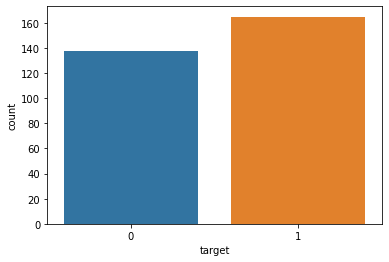

In [12]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### Analysing the 'Sex' feature

In [14]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

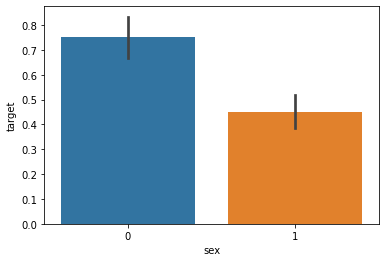

In [15]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

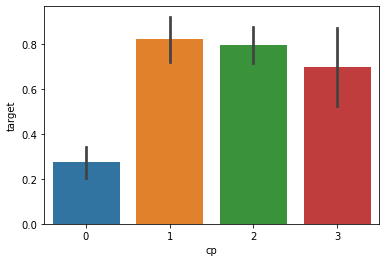

In [17]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [18]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [19]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

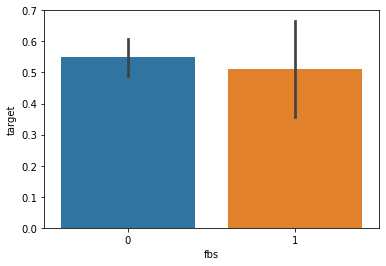

In [20]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [21]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

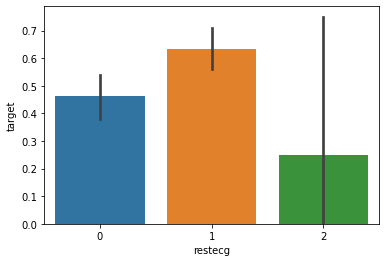

In [22]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [23]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

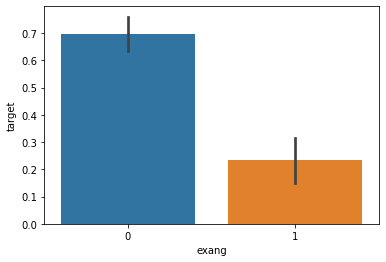

In [24]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [25]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

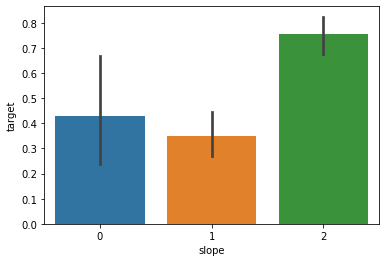

In [26]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [27]:
#number of major vessels (0-3) colored by flourosopy

In [28]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

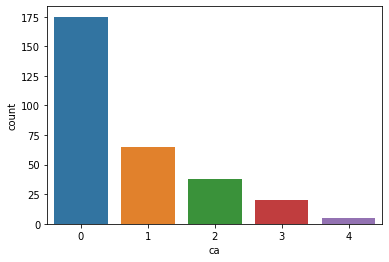

In [29]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

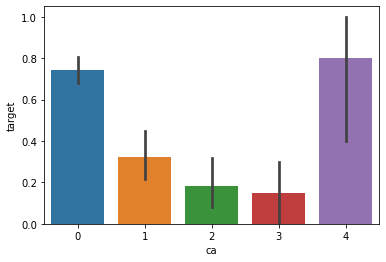

In [30]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [31]:
### Analysing the 'thal' feature

In [32]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

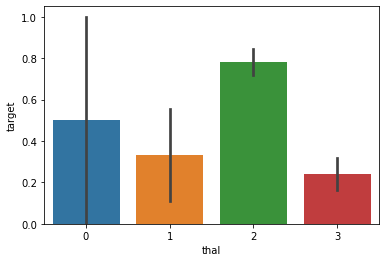

In [33]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

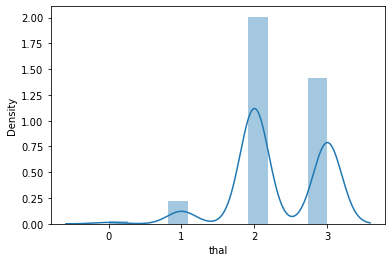

In [34]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [35]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [36]:
print('TRAINING SET')
print(X_train.shape)
print(Y_train.shape)

TRAINING SET
(242, 13)
(242,)


In [37]:
print('TEST SET')
print(X_test.shape)
print(Y_test.shape)

TEST SET
(61, 13)
(61,)


## V. Model Fitting

In [38]:
from sklearn.metrics import accuracy_score


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [40]:
Y_pred_lr.shape

(61,)

In [41]:
Y_pred_lr

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [42]:
Y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [43]:
Y_test=Y_test.to_numpy()

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,3)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.246 %


In [45]:
MAE_lr=mean_absolute_error(Y_pred_lr, Y_test)
MSE_lr=mean_squared_error(Y_pred_lr, Y_test)

In [46]:
print('MAE:', mean_absolute_error(Y_pred_lr, Y_test))
print('MSE:',mean_squared_error(Y_pred_lr, Y_test))

MAE: 0.14754098360655737
MSE: 0.14754098360655737


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(61,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [50]:
MAE_nb=mean_absolute_error(Y_pred_nb, Y_test)
MSE_nb=mean_squared_error(Y_pred_nb, Y_test)

In [51]:
print('MAE:', mean_absolute_error(Y_pred_nb, Y_test))
print('MSE:',mean_squared_error(Y_pred_nb, Y_test))

MAE: 0.14754098360655737
MSE: 0.14754098360655737


### SVM

In [52]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [53]:
Y_pred_svm.shape

(61,)

In [54]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [55]:
MAE_svm=mean_absolute_error(Y_pred_svm, Y_test)
MSE_svm=mean_squared_error(Y_pred_svm, Y_test)

In [56]:
print('MAE:', mean_absolute_error(Y_pred_svm, Y_test))
print('MSE:',mean_squared_error(Y_pred_svm, Y_test))

MAE: 0.18032786885245902
MSE: 0.18032786885245902


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(1000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

90.16
323


In [58]:
Y_pred_rf.shape

(61,)

In [59]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [60]:
MAE_rf=mean_absolute_error(Y_pred_rf, Y_test)
MSE_rf=mean_squared_error(Y_pred_rf, Y_test)

In [61]:
print('MAE:', mean_absolute_error(Y_pred_rf, Y_test))
print('MSE:',mean_squared_error(Y_pred_rf, Y_test))

MAE: 0.09836065573770492
MSE: 0.09836065573770492


##  Output final score

In [62]:
scores = [score_lr,score_nb,score_svm,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.246 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

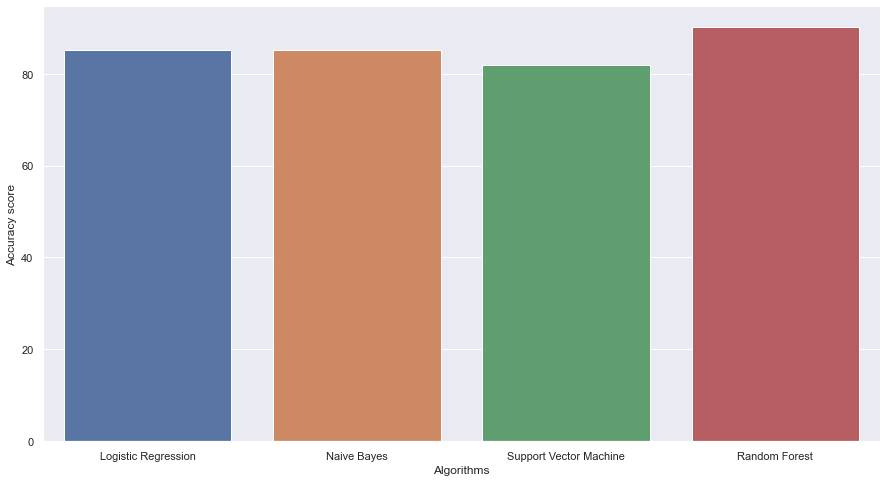

In [63]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [64]:
result=[["Logistic Regression",MAE_lr,MSE_lr],["svm",MAE_svm,MSE_svm],[" Naive bayes",MAE_nb,MSE_nb],["Random Forest",MAE_rf,MSE_rf]]
final_result= pd.DataFrame(result,columns=["Algorithms","MAE","MSE"])


In [65]:
final_result.sort_values(by=['MAE'])


,Algorithms,MAE,MSE
3,Random Forest,0.098361,0.098361
0,Logistic Regression,0.147541,0.147541
2,Naive bayes,0.147541,0.147541
1,svm,0.180328,0.180328


###  Random forest has good result as compare to other algorithms <br> <br>